<a href="https://colab.research.google.com/github/Disha-M885/RCC-Classification/blob/main/RCC_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow.keras.backend as K

from tensorflow.keras.models import Model
from tensorflow.keras.layers import *
from tensorflow.keras.layers import Activation, Add,DepthwiseConv2D, BatchNormalization, Concatenate, Conv2D, Dense,Dropout, GlobalAveragePooling2D, GlobalMaxPooling2D, Input, Lambda,LeakyReLU, MaxPooling2D, Multiply, Permute, Reshape, UpSampling2D
import collections
import tensorflow as tf
from tensorflow.keras import regularizers
from  tensorflow.keras.initializers import *
from tensorflow.keras.applications import VGG19

In [3]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_path = '/content/drive/MyDrive/RCC/Training'
test_path = '/content/drive/MyDrive/RCC/Test'
val_path = '/content/drive/MyDrive/RCC/Validation'
batch_size = 4
img_height = 224
img_width = 224
no_of_classes = 5
classes_name = [0,1,2,3,4]
input_shape = (img_height , img_width , 3)


random_seed = np.random.seed(1142)

datagen = ImageDataGenerator(rescale=1./255)

train_generator = datagen.flow_from_directory(
    train_path,
    target_size=(img_height, img_width),
    batch_size=16,
    class_mode='categorical',
    shuffle=True
)

validation_generator = datagen.flow_from_directory(
    val_path,
    target_size=(img_height, img_width),
    batch_size=16,
    class_mode='categorical',
    shuffle=True
)
def build_vgg19(input_shape=(224, 224, 3), num_classes=5):
    # Load VGG19 without the top (classifier) layers
    base_model = VGG19(weights='imagenet', include_top=False, input_shape=input_shape)

    # Freeze convolutional base (optional, if you want feature extraction only)
    for layer in base_model.layers[-4:]:
        layer.trainable = True

    # Add custom classifier on top
    x = base_model.output
    x = Flatten()(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(128, activation='relu')(x)
    output = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=output)
    return model

model_liver = build_vgg19(input_shape=(224, 224, 3), num_classes=5)

# unfreeze last conv block
for layer in model_liver.layers[-8:]:
    layer.trainable = True

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-5)
model_liver.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


history = model_liver.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=40
)


Found 3159 images belonging to 5 classes.
Found 503 images belonging to 5 classes.
80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/40
198/198 ━━━━━━━━━━━━━━━━━━━━ 1340s 7s/step - accuracy: 0.3096 - loss: 1.5310 - val_accuracy: 0.6839 - val_loss: 0.8441
Epoch 2/40
198/198 ━━━━━━━━━━━━━━━━━━━━ 72s 364ms/step - accuracy: 0.6540 - loss: 0.8381 - val_accuracy: 0.8072 - val_loss: 0.4856
Epoch 3/40
198/198 ━━━━━━━━━━━━━━━━━━━━ 74s 371ms/step - accuracy: 0.8033 - loss: 0.5063 - val_accuracy: 0.8370 - val_loss: 0.3278
Epoch 4/40
198/198 ━━━━━━━━━━━━━━━━━━━━ 76s 383ms/step - accuracy: 0.8549 - loss: 0.3452 - val_accuracy: 0.8390 - val_loss: 0.3710
Epoch 5/40
198/198 ━━━━━━━━━━━━━━━━━━━━ 76s 385ms/step - accuracy: 0.8928 - loss: 0.2689 - val_accuracy: 0.8688 - val_loss: 0.2949
Epoch 6/40
198/198 ━━━━━━━━━━━━━━━━━━━━ 76s 385ms/step - accuracy: 0.9072 - loss: 0.1911 - val_accuracy: 0.8231 - val_loss: 0.4108
Epoch 7/40
198/198 ━━━━━━━━━━━━━━━━━━━━ 77s 389ms/step - accuracy: 0.9198 - loss: 0.1862 - val_accuracy: 0.8429 - val_loss: 0.3913
Epoch 8/40
198/198 ━━━━━━━━━━━━━━━━━━━━ 81s 386ms/step - accuracy: 0.9282 - loss: 0.

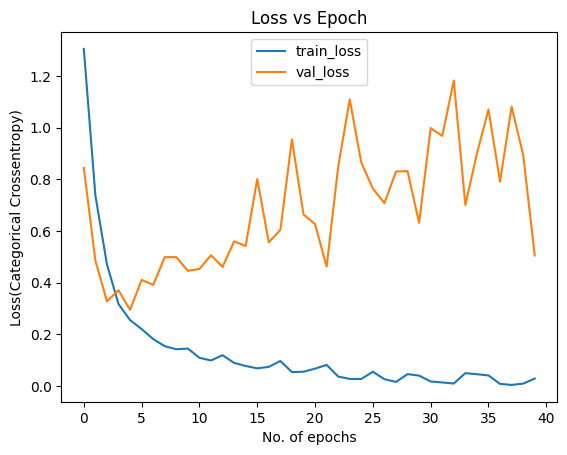

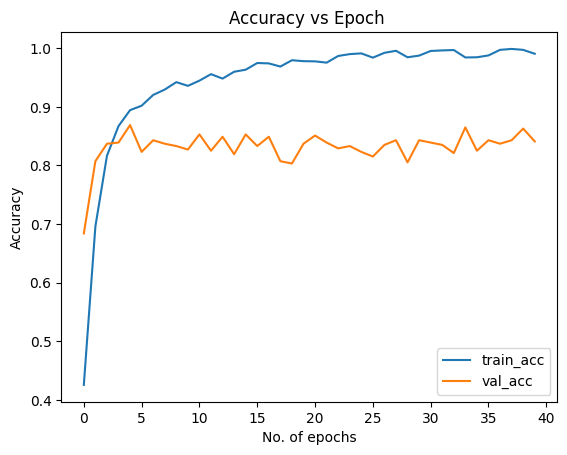

In [22]:
np.save('/content/drive/MyDrive/RCC/new_work_222.npy',history.history)
model_liver.save_weights('/content/drive/MyDrive/Weight/new_work_222.weights.h5')
import matplotlib.pyplot as plt
plt.plot(history.history['loss'] , label = 'train_loss')
plt.plot(history.history['val_loss'] , label = 'val_loss')
plt.legend()
plt.xlabel("No. of epochs")
plt.ylabel("Loss(Categorical Crossentropy)")
plt.title("Loss vs Epoch")
# plt.savefig('E:/save-2/R1_loss.png')
plt.show()
#plt.savefig('90.98_loss.png')
plt.plot(history.history['accuracy'] , label = 'train_acc')
plt.plot(history.history['val_accuracy'] , label = 'val_acc')
plt.legend()
plt.xlabel("No. of epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Epoch ")
# plt.savefig('E:/save-2/R1_accuracy.png')
plt.show()

In [23]:
model_liver.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             

 Total params: 79,442,129 (303.05 MB)

 Trainable params: 26,480,709 (101.02 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 52,961,420 (202.03 MB)

In [16]:
test_d = ImageDataGenerator(rescale=1. / 255)
test = test_d.flow_from_directory(
    test_path,
    target_size=(img_height, img_width),
    batch_size=1,
    shuffle = False,
    class_mode='categorical')

Found 506 images belonging to 5 classes.


In [19]:
import numpy as np
test_step = test.n//test.batch_size
test.reset()
pred = model_liver.predict(test , steps = test_step , verbose = 1)
pred_class_indices = np.argmax(pred,axis=1)

## printing predicted labels
print(pred_class_indices)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


506/506 ━━━━━━━━━━━━━━━━━━━━ 221s 433ms/step
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 1 1 1 1 1 1 1 1
 1 1 1 1 3 1 1 1 1 1 1 1 1 3 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 3 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 2 1 1 1 1 1 2 2 2 2 2 0 2 2 2 2 2 2
 2 2 2 2 2 1 3 2 3 2 2 2 2 1 1 1 1 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 2
 2 3 2 3 3 2 2 2 2 1 1 1 2 2 1 2 1 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 3 2 3 2
 2 2 2 2 1 1 1 3 2 2 3 2 2 3 2 2 2 3 3 3 3 3 3 3 3 3 3 3 4 3 2 2 2 2 3 2 2
 2 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 3 2 3 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 4 3 2
 2 2 3 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 2 3 3 2 2 3 3 3 3 3 3 3 3 3 3
 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 3 3 3 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 3 3 3 4 4 4 

In [20]:
from sklearn.metrics import *
classes = [0,1,2,3,4]


for cl in classes:

    print("class: ",cl)

    a1 = np.uint8(test.labels == cl)
    a2 = np.uint8(pred_class_indices == cl)

    print('Accuracy {}'.format(accuracy_score(y_true=a1, y_pred=a2)))
    print('F1 {}'.format(f1_score(y_true=a1, y_pred=a2)))
    print('precision {}'.format(precision_score(y_true=a1, y_pred=a2)))
    print('recall {}'.format(recall_score(y_true=a1, y_pred=a2)))

    print('jaccard {}'.format(jaccard_score(y_true=a1, y_pred=a2)))
    print("_______________________________")

class:  0
Accuracy 0.9960474308300395
F1 0.9902912621359223
precision 0.9807692307692307
recall 1.0
jaccard 0.9807692307692307
_______________________________
class:  1
Accuracy 0.9486166007905138
F1 0.8828828828828829
precision 0.8521739130434782
recall 0.9158878504672897
jaccard 0.7903225806451613
_______________________________
class:  2
Accuracy 0.8853754940711462
F1 0.7040816326530612
precision 0.69
recall 0.71875
jaccard 0.5433070866141733
_______________________________
class:  3
Accuracy 0.8952569169960475
F1 0.736318407960199
precision 0.7708333333333334
recall 0.7047619047619048
jaccard 0.5826771653543307
_______________________________
class:  4
Accuracy 0.974308300395257
F1 0.93048128342246
precision 0.9560439560439561
recall 0.90625
jaccard 0.87
_______________________________


In [21]:
print('Accuracy {}'.format(accuracy_score(y_true=test.labels, y_pred=pred_class_indices)))
print('F1 {}'.format(f1_score(y_true=test.labels, y_pred=pred_class_indices,average = "macro")))
print('precision {}'.format(precision_score(y_true=test.labels, y_pred=pred_class_indices,average = "macro")))
print('recall {}'.format(recall_score(y_true=test.labels, y_pred=pred_class_indices,average = "macro")))

print('jaccard {}'.format(jaccard_score(y_true=test.labels, y_pred=pred_class_indices,average = "macro")))
print('confusion_matrix\n {}'.format(confusion_matrix(y_true=test.labels, y_pred=pred_class_indices)))
print('classification_report\n {}'.format(classification_report(y_true=test.labels, y_pred=pred_class_indices)))
print('\n\n')

Accuracy 0.849802371541502
F1 0.848811093810905
precision 0.8499640866379996
recall 0.849129951045839
jaccard 0.7534152126765792
confusion_matrix
 [[102   0   0   0   0]
 [  0  98   3   5   1]
 [  2  17  69   8   0]
 [  0   0  28  74   3]
 [  0   0   0   9  87]]
classification_report
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       102
           1       0.85      0.92      0.88       107
           2       0.69      0.72      0.70        96
           3       0.77      0.70      0.74       105
           4       0.96      0.91      0.93        96

    accuracy                           0.85       506
   macro avg       0.85      0.85      0.85       506
weighted avg       0.85      0.85      0.85       506




